## 2. Primeres Mètriques i Evaluació de Models

En aquesta pràctica entendrem i observarem la importancia que té evaluar i seleccionar mètodes de evaluacions acurats per a definir si el nostre model està funcionant tal i com esperem.

Les mètriques d'avaluació són específiques del tipus de tasca d'aprenentatge automàtic que realitza un model.

Per exemple, per a la tasca de classificació, el model s'avalua mesurant el grau de coincidència d'una categoria predita amb la categoria real. I, per a l'agrupació en clústers, l'avaluació es basa en el pròxims que estan els uns dels altres els elements agrupats i en el grau de separació existent entre els clústers.

En aquesta pràctica treballarem sobre un cas molt senzill utilitzant un KNN, que ja haureu vist en diferents assigantures durant els cursos.

L'algorisme KNN és un classificador d'aprenentatge supervisat, que utilitza la proximitat per fer classificacions o prediccions sobre l'agrupació d'un punt de dades individual. És un dels classificadors més populars i més senzills que s'utilitzen actualment en l'aprenentatge automàtic.

#### Primerament definirem el model sobre un dataset ja definit en la propia llibreria del sklearn

més informació a: [https://scikit-learn.org/stable/datasets/toy_dataset.html]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# import iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

<img src="images/iris_flowers.png" width="500">

#### Extreiem dades i etiquetes (X i y)

In [3]:
X= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64




#### Definim el train i el test per al model
aprofitem per transformar-ho a format numpy

In [6]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, shuffle= True, random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [7]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')


training set size: 120 samples 
test set size: 30 samples


#### Veiem les relacions entre variables

Text(0.5, 1.08, 'Pair Plot of the dataset Before normalization')

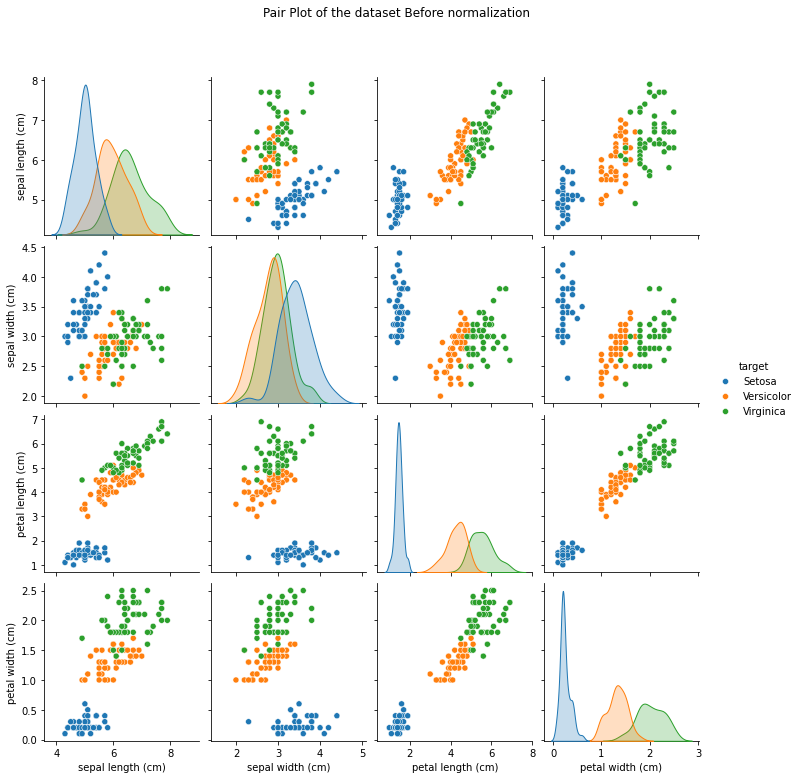

In [8]:
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)


### Normalització i estandarització de les dades

En l’àmbit del machine learning i l’anàlisi de dades, la preparació adequada de les dades és un pas fonamental per millorar el rendiment dels models. Dos dels mètodes més utilitzats per a aquest propòsit són la normalització i l'estandarització. Aquests processos permeten ajustar els valors de les característiques (atributs) per fer que les diferents escales i rangs dels valors no afectin negativament els algorismes. Mentre que la normalització s’utilitza per ajustar la magnitud dels vectors de característiques, l'estandarització s’encarrega de centrar i escalar les dades de manera que tinguin una distribució coherent, facilitant així una millor convergència dels models i un rendiment més òptim en la classificació, regressió o altres tasques de predicció.

La normalització o estandarització de les dades és crucial en l’algorisme de K-Nearest Neighbors (KNN) perquè aquest algorisme es basa en el càlcul de distàncies per determinar la semblança entre les mostres. L'algorisme KNN classifica les mostres noves comparant-les amb les mostres existents del conjunt d'entrenament, utilitzant mesures de distància com la distància Euclidiana o la distància Manhattan. Això vol dir que KNN calcula distàncies entre els punts en funció dels valors de les característiques. Si les característiques tenen escales molt diferents (per exemple, si una característica va de 0 a 1000 i una altra de 0 a 10), la característica amb una escala més gran tindrà un impacte desproporcionat en el càlcul de la distància, dominant les altres característiques, encara que no sigui la més important per a la tasca de classificació.

Per a més informació en les diferents maneres de normalitzar les dades i els seus efectes podeu conultar: [https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing]

### Normalització per norma


La **normalització per norma** és un procés en què els vectors de característiques es reescalen perquè la seva magnitud total sigui 1, mantenint les proporcions relatives entre les característiques. 

Donat un vector de característiques $$ (\mathbf{x} = [x_1, x_2, ..., x_n]) $$ , la normalització per **norma L2** es calcula de la següent manera:

$$
\mathbf{x}' = \frac{\mathbf{x}}{||\mathbf{x}||_2} = \frac{\mathbf{x}}{\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}}
$$


In [9]:
scaler = Normalizer().fit(x_train)
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set


### <font color='red'> Mai, mai mai

In [10]:
scaler = Normalizer().fit(x_test)  # motiu per suspendre l'assignatura directament
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [11]:
scaler = Normalizer().fit(x_train)
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [12]:
print('x_train before Normalization')
print(x_train[0:5])
print('\nx_train after Normalization')
print(normalized_x_train[0:5])

x_train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x_train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

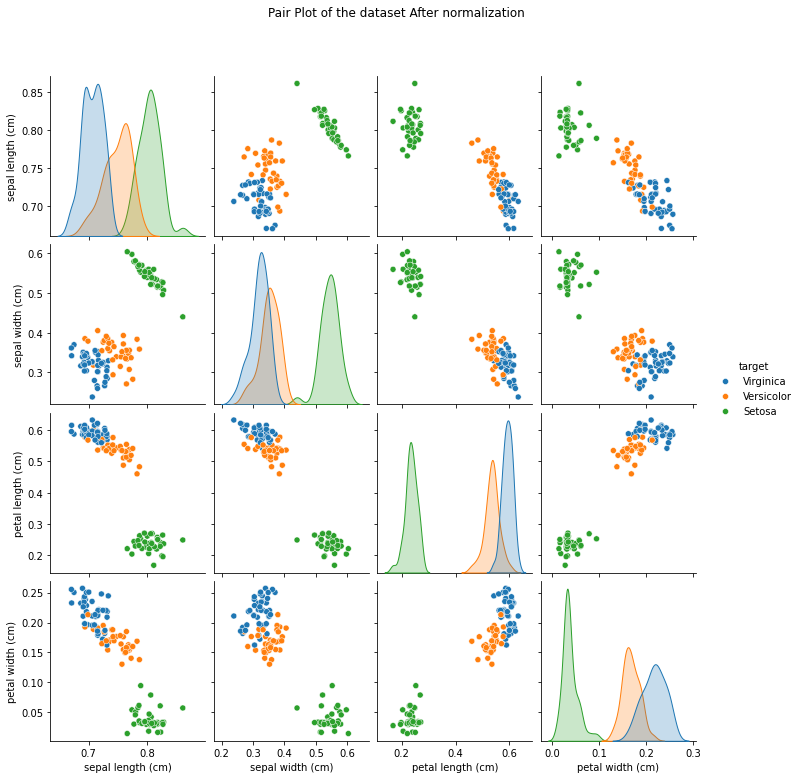

In [13]:
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train], columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

#### Entrenament del model

In [14]:
k=3
knn=KNeighborsClassifier(k)
knn.fit(normalized_x_train, y_train)
y_pred = knn.predict(normalized_x_test)
print(y_pred)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [15]:
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred)}')

The accuracy of sklearn implementation is 0.9666666666666667


# Primeres mètriques

**En aquest exemple anem a provar amb un dataset binari anomenat Pima. El Pima Indians Diabetes Dataset és un conjunt de dades que conté informació mèdica de dones d'ascendència Pima, utilitzat freqüentment en machine learning per a problemes de classificació binària (diabetis o no diabetis). Els atributs inclouen valors numèrics com la glucosa, pressió arterial, índex de massa corporal, entre d'altres**

In [16]:
from pandas import read_csv
# load the dataset
dataframe = read_csv("pima-indians-diabetes.csv", header=0, names=["Pregnancies", "Glucose", "Blood Preassure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction","Age", "class"])
# get the values
values = dataframe.values
X, y = values[:, :-1], values[:, -1]
# gather details
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(y)
n_classes = len(classes)
# summarize
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')
# class breakdown
breakdown = ''
for c in classes:
    total = len(y[y == c])
    ratio = (total / float(len(y))) * 100
    print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

N Examples: 767
N Inputs: 8
N Classes: 2
Classes: [0. 1.]
Class Breakdown:
 - Class 0.0: 500 (65.18905%)
 - Class 1.0: 267 (34.81095%)


In [17]:
dataframe.head()

,Pregnancies,Glucose,Blood Preassure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Text(0.5, 1.08, 'Pair Plot of the Pima Dataset')

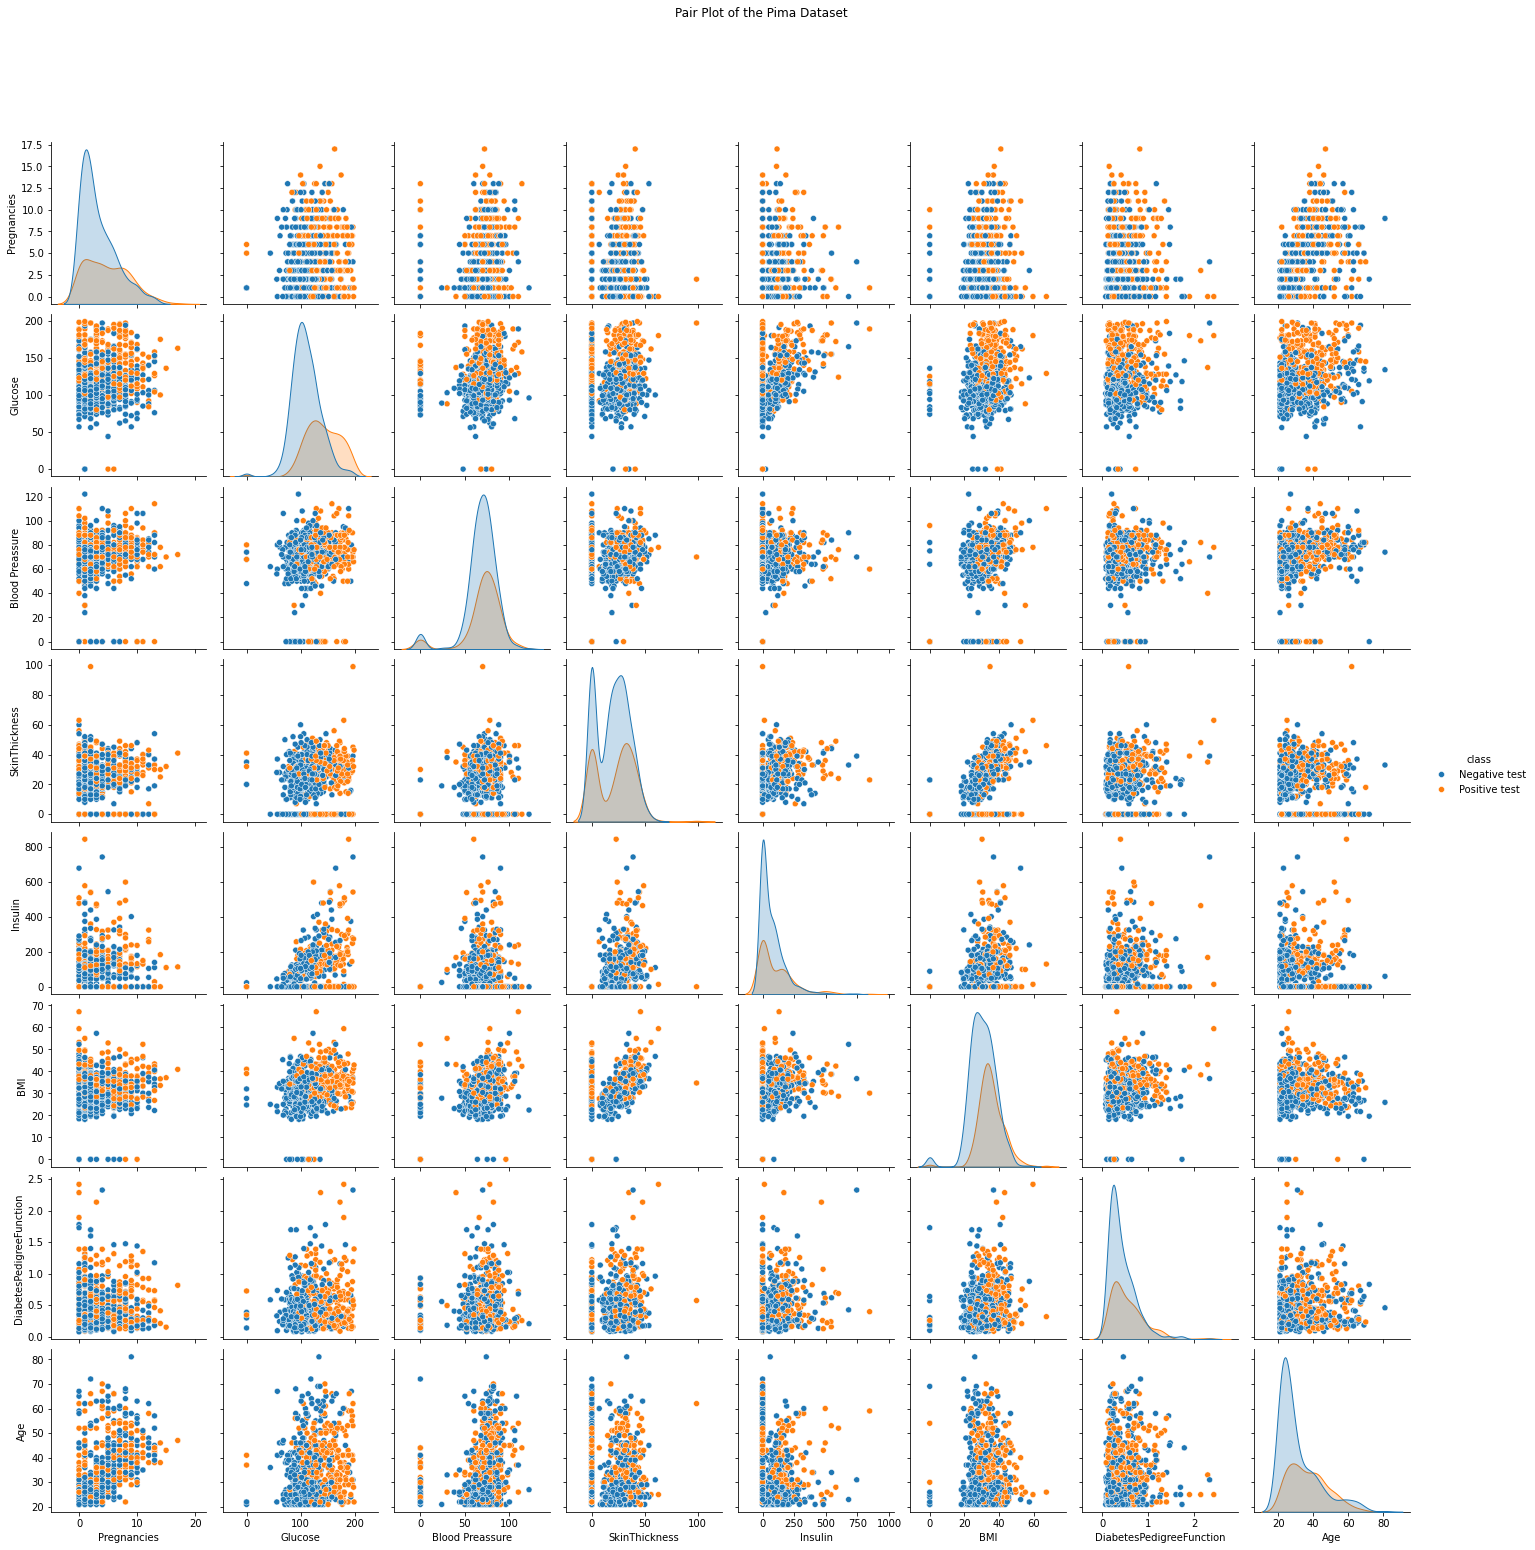

In [18]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Negative test', 1.0: 'Positive test'} # dictionary

before= sns.pairplot(dataframe.replace({'class': di}), hue= 'class')
before.fig.suptitle('Pair Plot of the Pima Dataset', y=1.08)

In [19]:
## Definim el train i el test per al model
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, shuffle= True, random_state= 0)
x_train_pima= np.asarray(x_train)
y_train_pima= np.asarray(y_train)

x_test_pima= np.asarray(x_test)
y_test_pima= np.asarray(y_test)

In [20]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 613 samples 
test set size: 154 samples


### Normalitzar
<font color='blue'> En el context del dataset Pima Indians Diabetes, hauriem de buscar la normalització més adequada i comprovar si és necessària, degut a que les característiques estan a diferents escales i unitats. Apliqueu-ne una</font>

In [21]:
scaler = ???
scaler.fit(???)
normalized_x_train_pima= ???
normalized_x_test_pima= ???

SyntaxError: invalid syntax (1769797216.py, line 1)

In [ ]:
k=9

knn_pima = KNeighborsClassifier(k)

#ajustar model
knn_pima.fit(???, ???)

#predicció
y_pred_pima = ???

#calcular accuracy
acc = ???

print(f'The accuracy of sklearn implementation is {acc}')

**Un 76% pot ser indicador de que el model no és del tot dolent i que pot aprendre a classificar mostres del dataset, però ens agradaria saber en què s'ha equivocat.**

<font color='blue'>Com hem pogut observar, la normalització de dades és un pas important, però no sempre és necessària. En el cas del dataset Iris, hem vist que aquest preprocessament és crucial, mentre que, per al dataset Pima, no ho és tant. Existeixen diverses estratègies per normalitzar les dades, com el Min-Max Scaler o el Standard Scaler, però no totes són igual d'efectives per a qualsevol conjunt de dades. Algunes tècniques ofereixen millors resultats en determinades situacions que en d'altres. Investiga les principals maneres de normalitzar les dades i explica en quins casos són més adequades unes estratègies en comparació amb altres.</font>

**Resposta:**

### Confusion Matrix

Una matriu de confusió és una taula resumida que s'utilitza per avaluar el rendiment d'un model de classificació.

El accuracy pot ser enganyosa si s'utilitza amb conjunts de dades desequilibrats, i, per tant, hi ha altres mètriques basades en la matriu de confusió que poden ser útils per avaluar el rendiment.


<img src="images/CF.jpeg" width="500">


<img src="images/Precision_recall.png" width="500">



En aquest cas, una de les mètriques més importants en temes de classificació binaria és el **F-score**, que et parla de la relació entre la **precissió** i el **recall**, dues mètriques molt importants. Per tant, en tasques de classificació equilibrades (on una de les mètriques no sigui més important que l'altra) és important utilitzar aquesta mètrica.

$$
F_{1} = \frac{2 \cdot \text{Precisión} \cdot \text{Recall}}{\text{Precisión} + \text{Recall}}
$$


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_pima, y_pred_pima)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabètic","Diabètic"])
disp.plot()
plt.show()


**Volem calcular la *Precision* i el *Recall*:**
- Precision: És la proporció de veritables positius (TP) entre tots els exemples predits com a positius, és a dir, mesura quantes de les prediccions positives són correctes.
- Recall: És la proporció de veritables positius (TP) entre tots els exemples que són realment positius, és a dir, mesura quants dels positius reals són correctament identificats.

In [ ]:
precision = precision_score(y_test_pima, y_pred_pima)
recall = recall_score(y_test_pima, y_pred_pima)
print(f"Precision: {precision} \nRecall: {recall}")

<font color='blue'>Programeu una classe per generar una matriu de confusió (TP, FP, TN, FN) i implementeu diverses funcions que permetin calcular les principals mètriques derivades d'aquesta matriu: precisió (precision), sensibilitat (recall), especificitat (specificity) i la mesura F1 (F-score)</font>

In [ ]:
class Confusion_Matrix(object):
    
    
    def __init__(self, y_pred :list, gt:list):
        assert len(y_pred) == len(gt), "Les prediccions i el gt tenen shapes diferents"
        self._y_pred = y_pred
        self._gt = gt
        
        self.get_confusion()
        
        
    def get_confusion(self):
        self._tp = (self._y_pred ==1 and self._gt ==1).sum()
        self._fp = ???
        self._fn = ???
        self._tn = ???
        
   
    def accuracy(self):
        return (self._tp + self._tn)/(self._tp + self._tn + self._fp + self._fn)
    
    def precision(self):
        return ???
    
    def recall(self):
        return ???
    
    def specificity(self):
        return ???
    
    def f_score(self):
        return ???

### ROC curve
La ROC curve (Receiver Operating Characteristic curve) i la PR curve (Precision-Recall curve) són eines gràfiques utilitzades per avaluar el rendiment d'un model de classificació, especialment en situacions de classificació binària . Tot i que les dues corbes serveixen per mesurar la qualitat del model, s'enfoquen en diferents aspectes del mateix.

Una corba ROC ideal s'aproxima al vèrtex superior esquerre del gràfic, cosa que indica una alta taxa de veritables positius i una baixa taxa de falsos positius. L'Àrea Sota la Corba ROC (AUC-ROC) és una mètrica comuna derivada de la corba. Un valor d'AUC proper a 1 indica un model excel·lent, mentre que un valor proper a 0.5 suggereix un model que no és millor que endevinar l'atzar.

- Eix X: Taxa de Falsos Positius (False Positive Rate, FPR) = FP/(FP+TN). Representa el percentatge de vegades que el model prediu incorrectament una classe positiva quan en realitat era negativa.
- Eix Y: Taxa de Veritables Positius (True Positive Rate, TPR) o Sensibilitat (Recall) = TP / (TP + FN). Representa el percentatge de vegades que el model prediu correctament la classe positiva quan realment és positiva.

<img src="images/Roc_curve.svg.png" width="300">



In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
y_pred = knn_pima.predict(normalized_x_test_pima)
y_pred_prob = knn_pima.predict_proba(normalized_x_test_pima)
for pred, prob in zip(y_pred[:6], y_pred_prob[:6]):
    print(f"{pred}    {prob}")

El mètode *predict_proba* a l'algorisme K-Nearest Neighbors (KNN) permet obtenir probabilitats de classificació en lloc de prediccions directes de classe.

Exemple: Suposem que estem classificant una nova instància amb k = 5, i els veïns més propers estan distribuïts de la següent manera:

- 3 veïns pertanyen a la classe positiva (1).
- 2 veïns pertanyen a la classe negativa (0).
En aquest cas, la probabilitat que la instància pertanyi a la classe positiva (1) seria:

$$
P(\text{classe positiva}) = \frac{3}{5} = 0.6
$$
Y la probabilitat de que pertanyi a la classe negativa (0) seria:

$$
P(\text{classe negativa}) = \frac{2}{5} = 0.4
$$

Nosaltres utilitzarem el segon valor de cada element com a threshold, el qual reflecteix la probabilitat que una persona tingui diabetis.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_pima, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend(loc="lower right")
plt.show()

**Quines conclusions podem treure amb aquesta gràfica? Quin és el threshold òptim?**

*Un AUC de 0,76 indica que el model té un rendiment acceptable o bo per distingir entre les classes positives i negatives. En una escala de 0 a 1, on 1 és el rendiment perfecte i 0,5 és un rendiment equivalent a endevinar a l'atzar, un AUC superior a 0,7 però inferior a 0,8 suggereix que el model té una bona capacitat predictiva, encara que no és excel·lent.*

*Amb un threshold de 0.625, el FPR és 0,0792, mentre que el TPR és 0,4717. Això suggereix que en aquest punt el model té un 47% de True Positives, mentre que només té un 7.9% de False Positives, cosa que és una bona proporció en aquest punt.
A mesura que el threshold continua disminuint, per a un threshold de 0.125, el FPR s'eleva a 0.7129 (71.3% de False Positives) mentre que el TPR puja a 0.8867 (88.7% de True Positives), cosa que indica que encara que el model captura la majoria dels True Positives, també s'està equivocant molt més a l'hora de predir falsos positius.*

*Els thresholds més alts (com 0.875 i 0.75) generen molt pocs falsos positius (FPR = 0), però la sensibilitat és baixa, la qual cosa significa que el model està predint poques observacions com a positives, la qual cosa podria ser arriscada si és important capturar la majoria de les instàncies positives.*
*Un threshold baix (com 0.125) captura més positius (alt TPR), però a costa de predir molts falsos positius (alt FPR). Aquest podria no ser un llindar ideal si les prediccions falses positives són molt costoses.*

<font color='blue'> Entrena 4 models KNN amb diferents valors de k (k=3, k=5, k=7, k=9) utilitzant el dataset "Pima Indians Diabetis". Calcula i mostra les 4 corbes ROC corresponents a cada model en una mateixa gràfica, assegurant-te d'incloure a la llegenda el valor de k i l'AUC de cada corba. Com a conjunt de dades, farem servir el ja normalitzat *normalized_x_train_pima* i *normalized_x_test_pima* </font>

In [ ]:
# Valores de k a utilitzar
k_values = [3, 5, 7, 9, 11]
plt.figure()

colors = ['blue', 'green', 'red', 'purple', 'orange']
roc_auc = []

# Entrenar y calcular la corba ROC per cada valor de k
for i, k in enumerate(k_values):
    # Definir el model
    knn_pima = ???
    knn_pima.fit(???, ???)

    # Predir las probabilitats
    y_pred_prob = knn_pima.predict_proba(???)

    # Calcular la corba ROC i el AUC
    fpr, tpr, thresholds = ???
    roc_auc.append(auc(fpr, tpr))
    
    # Graficar la corba ROC
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'KNN (k={k}, AUC = {roc_auc[-1]:.2f})')

    for j, threshold in enumerate(thresholds):
        plt.annotate(f'{threshold:.2f}', (fpr[j], tpr[j]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different KNN Models')
plt.legend(loc="lower right")
plt.show()

#### Hi ha maneres de calcular el millor threshold. Un exemple és la G-mean i la J-statistic.

<img src="images/Thres.png" width="1000">


In [ ]:
def J_statistic(y_true:list, y_score:list):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    
        # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    return best_thresh
    

In [ ]:
J_statistic(y_test_pima, y_pred_prob[:,1])

### K-Fold Cross Validation


La validació creuada o cross-validation és una tècnica utilitzada per a avaluar els resultats d'una anàlisi estadística i garantir que són independents de la partició entre dades d'entrenament i prova. Consisteix a repetir i calcular la mitjana aritmètica obtinguda de les mesures d'avaluació sobre diferents particions.

El mètode K-Fold Cross-Validation és també un procés iteratiu. Consisteix a dividir les dades de manera aleatòria en k grups d'aproximadament la mateixa grandària, k-1 grups s'empren per a entrenar el model i un dels grups s'empra com a validació. Aquest procés es repeteix k vegades utilitzant un grup diferent com a validació en cada iteració. El procés genera k estimacions de l'error la mitjana del qual s'empra com a estimació final.

Dos avantatges del mètode K-Fold Cross-Validation enfront del LOOCV:

Requeriments computacionals: el nombre d'iteracions necessàries ve determinat pel valor k triat. En general, es recomana un k entre 5 i 10.

Balanç entre bias i variància: el principal avantatge de K-fold CV és que aconsegueix una estimació precisa de l'error de test gràcies a un millor balanç entre bias i variància. LOOCV empra n-1 observacions per a entrenar el model, la qual cosa és pràcticament tot el set de dades disponible, maximitzant així l'ajust del model a les dades disponibles i reduint el bias. No obstant això, per a l'estimació final de l'error es fan una mitjana de les estimacions de n models entrenats amb pràcticament les mateixes dades (només hi ha una dada de diferència entre cada conjunt d'entrenament), per la qual cosa estan altament correlacionats. Això es tradueix en un major risc de overfitting i per tant de variància. En el mètode K-fold CV els k grups emprats com a entrenament són molt menys solapants, la qual cosa es tradueix en menor variància en fer una mitjana de les estimacions d'error.



<img src="images/Cross.png" width="1000">

In [ ]:
from sklearn.model_selection import cross_val_score,cross_validate

dataframe = read_csv("pima-indians-diabetes.csv", header=0, names=["Pregnancies", "Glucose", "Blood Preassure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction","Age", "class"])
values = dataframe.values
X, y = values[:, :-1], values[:, -1]


clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, y, cv=3)
scoring = ['accuracy', 'precision_macro', 'recall_macro']
cvs = cross_validate(clf, X, y, cv=3, scoring=scoring, return_estimator=True, return_indices=False)


In [ ]:
cvs

<font color='blue'> Implementa un model KNN amb validació creuada K-Fold (CV=10), avalua el accuracy, precision i recall mitjà per a valors de k entre 1 i 15, i selecciona el k amb millor rendiment. </font>

In [ ]:
dataframe = pd.read_csv("pima-indians-diabetes.csv", header=0, names=["Pregnancies", "Glucose", "Blood Preassure", "SkinThickness","Insulin", "BMI", "DiabetesPedigreeFunction","Age", "class"])
values = dataframe.values
X, y = values[:, :-1], values[:, -1]

k_values = [1, 3, 5, 7, 9, 11, 13, 15]

kf = KFold(n_splits=???, shuffle=True, random_state=42)

scoring = { 'accuracy': 'accuracy', 'precision_macro': 'precision_macro','recall_macro': 'recall_macro'}

results = {metric: {} for metric in scoring}
for k in k_values:
    model = ???
    scores = ???
    results['accuracy'][k] = scores.mean()
    
    precision_scores = ???
    results['precision_macro'][k] = precision_scores.mean()
    
    recall_scores = ???
    results['recall_macro'][k] = recall_scores.mean()

best_k_accuracy = max(results['accuracy'], key=results['accuracy'].get)
best_k_precision = max(results['precision_macro'], key=results['precision_macro'].get)
best_k_recall = max(results['recall_macro'], key=results['recall_macro'].get)

print(f'El millor valor de K basat en accuracy es {best_k_accuracy} amb una accuracy promig de {results["accuracy"][best_k_accuracy]:.4f}')
print(f'El millor valor de K basat en precisión macro es {best_k_precision} amb una precisión macro promig de {results["precision_macro"][best_k_precision]:.4f}')
print(f'El millor valor de K basat en recall macro es {best_k_recall} amb un recall macro promig de {results["recall_macro"][best_k_recall]:.4f}')


## Preguntes teòriques

<font color='blue'>A continuació, se us presenten tres situacions en què haureu de decidir com balancejar un model de classificació. Reflexioneu sobre la mètrica més adequada a prioritzar en cada cas, tenint en compte les característiques específiques de les dades i l'objectiu del model: </font>

<font color='blue'>1. Esteu desenvolupant un mètode per detectar càncer de pulmó utilitzant dades privades. La dificultat principal és que disposeu de poques dades, ja que són difícils d'aconseguir. Tot i que voldríeu obtenir una precisió elevada, la disponibilitat limitada de dades us obliga a reconsiderar les vostres prioritats.</font>

<font color='blue'>2. Teniu un sistema que ha de detectar quins mòbils Apple d'un lot estan defectuosos abans de ser comercialitzats. Suposeu que rebeu un lot de 100 dispositius, però només 10 d'ells funcionen correctament. L'objectiu és seleccionar almenys 5 mòbils que no estiguin defectuosos.</font>

<font color='blue'>3. Treballeu en un sistema recomanador de YouTube, i el vostre objectiu és recomanar vídeos de la manera més precisa possible, maximitzant el nombre de recomanacions que agradin als usuaris. Voleu oferir contingut rellevant i evitar recomanacions errònies, que puguin desincentivar l'ús de la plataforma.</font>